In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [33]:
df=pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

We have 891 rows and 12 columns in our dataset

In [5]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Our target variable 'Survived' is somewhat balanced, 549 people didn't survuved the sinking while 342 people survived

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Since there is high percentage of missing values in Cabin we will drop the entire Cabin column. We replace the missing values in Age with median value. We replace the missing values in Embarked with the most frequent value.

In [7]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Name, sex, ticket Cabin and embarked are object type so we will label encode it.

As name and ticked would be difficult to convert to numbers, so we will drop hem for futher calculations. Also, Cabin also have many missing values so we will drop it

In [34]:
df.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)

We will replace null values in age with median and in Embarked with mode

In [35]:
df['Age'].fillna(df['Age'].median(),inplace=True)

In [36]:
df['Embarked'].fillna(df['Embarked'].mode(),inplace=True)

<AxesSubplot:>

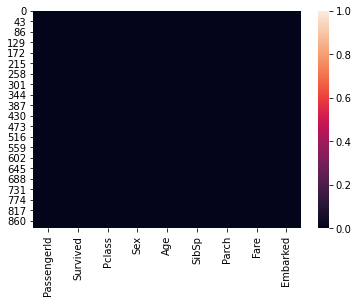

In [11]:
sns.heatmap(df.isnull())

As we can see there are no null values in the dataset now

<AxesSubplot:xlabel='Sex', ylabel='count'>

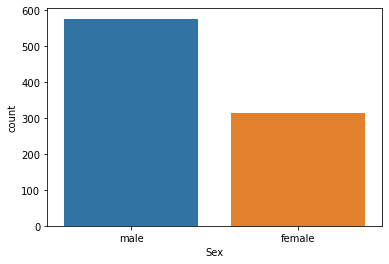

In [12]:
sns.countplot(df['Sex'])

Female passenger are less than male passengers

### Univariate Analysis

<AxesSubplot:ylabel='Frequency'>

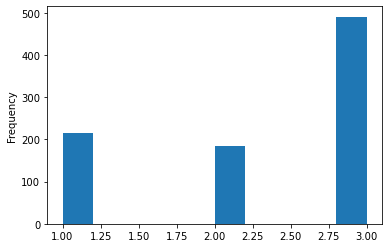

In [21]:
df['Pclass'].plot.hist()

Number of passenger in 3rd class is highest followed by 1st class and 2nd class

<AxesSubplot:ylabel='Frequency'>

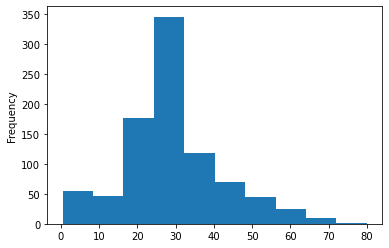

In [22]:
df['Age'].plot.hist()

Most of the passengers are youngesters, very less old age people

<AxesSubplot:ylabel='Frequency'>

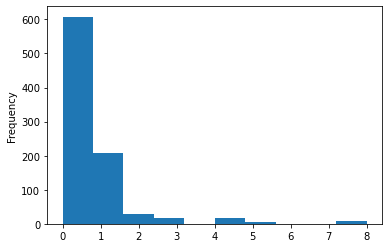

In [23]:
df['SibSp'].plot.hist()

Most of the passengers have 0 or 1 siblings or spouse with them

<AxesSubplot:ylabel='Frequency'>

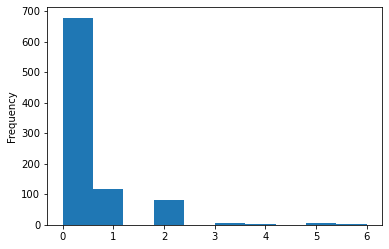

In [24]:
df['Parch'].plot.hist()

Most of the Passengers have 0 or 1 children or parents with them. Few have more than3 children

<AxesSubplot:ylabel='Frequency'>

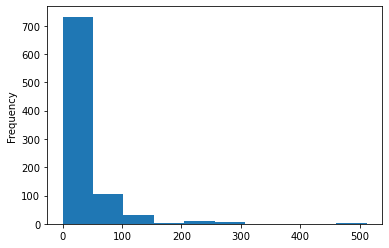

In [26]:
df['Fare'].plot.hist()

Most of the passengers paid less than Rs.100 fare.

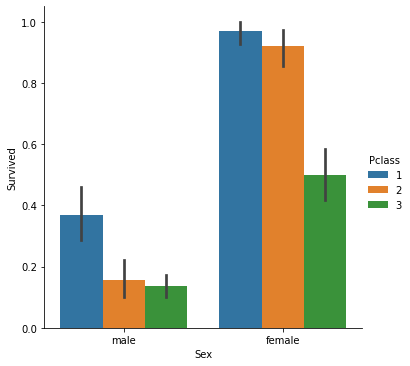

In [29]:
sns.catplot(x="Sex", y="Survived", hue="Pclass", kind="bar", data=df)



It is not a surprise, but we can see from the plots that survivors were mostly from the first class and there were more women than men.


In [37]:
bins = [0, 10, 20, 30, 40, 50, 60,70,99]
df['AgeBinned'] = pd.cut(df['Age'], bins)
df[["AgeBinned", "Survived"]].groupby(['AgeBinned']).mean()

,Survived
AgeBinned,
"(0, 10]",0.593750
"(10, 20]",0.382609
"(20, 30]",0.334152
"(30, 40]",0.445161
"(40, 50]",0.383721
"(50, 60]",0.404762
"(60, 70]",0.235294
"(70, 99]",0.200000


We can see most of the survived passengers includes Children, followed by age between 30-40 and 50-60 

<AxesSubplot:xlabel='AgeBinned', ylabel='count'>

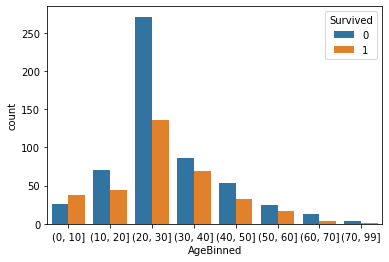

In [36]:
sns.countplot(x ='AgeBinned', hue = "Survived", data = df)        

Very less people between the age of 20-30 survived the sinking.

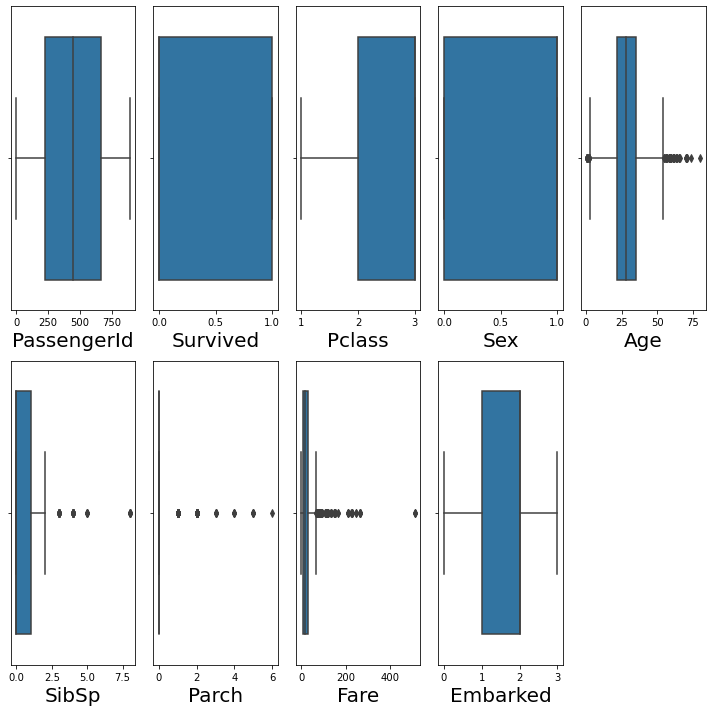

In [26]:

plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=9:
        ax=plt.subplot(2,5,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()  

We can see there are outliers in Age SibSp,Parch and Fare

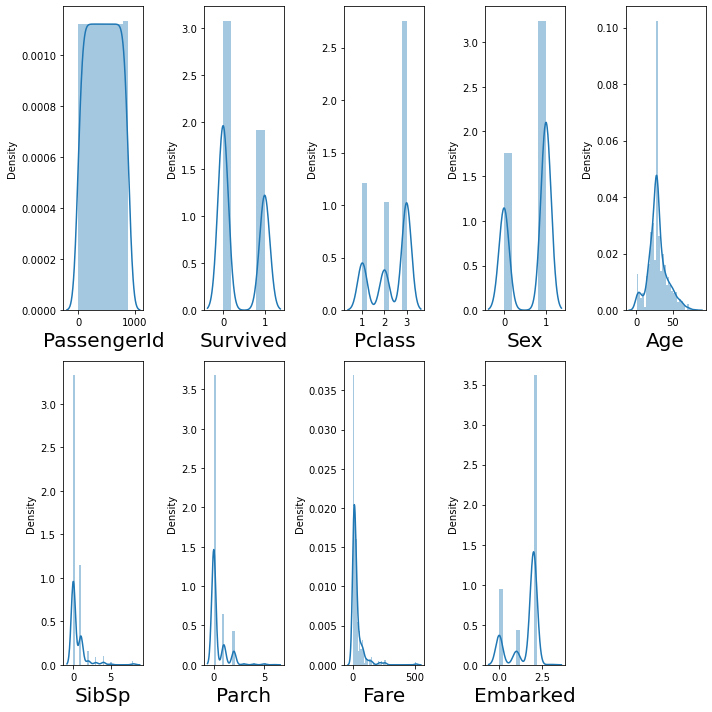

In [28]:
#Bivariate Analysis
plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=9:
        ax=plt.subplot(2,5,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()   

Data is skewed in SibSp,Parch and Fare

In [43]:
#Removing the outliers:

from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.73010796, 0.78927234, 0.82737724, ..., 0.47367361, 0.50244517,
        0.58111394],
       [1.72622007, 1.2669898 , 1.56610693, ..., 0.47367361, 0.78684529,
        1.93846038],
       [1.72233219, 1.2669898 , 0.82737724, ..., 0.47367361, 0.48885426,
        0.58111394],
       ...,
       [1.72233219, 0.78927234, 0.82737724, ..., 2.00893337, 0.17626324,
        0.58111394],
       [1.72622007, 1.2669898 , 1.56610693, ..., 0.47367361, 0.04438104,
        1.93846038],
       [1.73010796, 0.78927234, 0.82737724, ..., 0.47367361, 0.49237783,
        0.67867322]])

In [45]:
df=df[(z<3).all(axis=1)]

In [46]:
df.shape

(820, 9)

After removing outliers, We have 820 rows and 9 columns

In [40]:
#Performing Label Encoding for the dataset
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])    
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])    

In [41]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [47]:
corr_matrix = df.corr()
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.330439
Parch          0.201071
SibSp          0.094459
PassengerId   -0.013852
Age           -0.086026
Embarked      -0.150562
Pclass        -0.322306
Sex           -0.554888
Name: Survived, dtype: float64

Sex,Pclass and Fare have highest correlation with the survival 

In [100]:
#Separating x and y for model evaluation
x=df[['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
y=df[['Survived']]

In [101]:
x.skew()

PassengerId    0.003454
Pclass        -0.632242
Sex           -0.664152
Age            0.401952
SibSp          1.979577
Parch          2.122629
Fare           2.318761
Embarked      -1.257511
dtype: float64

Removing the skewness

In [102]:
x['SibSp']=np.cbrt(x['SibSp'])

In [103]:
x['Parch']=np.cbrt(x['Parch'])
x['Fare']=np.cbrt(x['Fare'])

In [104]:
x.shape

(820, 8)

In [105]:
y.shape

(820, 1)

### Finding the best random state

In [106]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    predrf=lg.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)  

Best accuracy is  0.8414634146341463  on Random_state  198


In [53]:
#splitting data into training and testing datasets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

### Model Evaluaution

0.7164179104477612
[[122  44]
 [ 32  70]]
              precision    recall  f1-score   support

           0       0.79      0.73      0.76       166
           1       0.61      0.69      0.65       102

    accuracy                           0.72       268
   macro avg       0.70      0.71      0.71       268
weighted avg       0.72      0.72      0.72       268



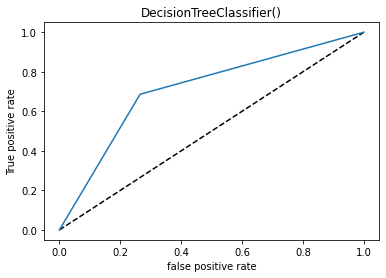

auc_score: 0.7106071344200331




In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))
y_pred_prob=dtc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=dtc)
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.title(dtc)
plt.show()
auc_score=roc_auc_score(y_test,dtc.predict(x_test))
print("auc_score:" ,auc_score)
print("\n")

0.8171641791044776
[[145  21]
 [ 28  74]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       166
           1       0.78      0.73      0.75       102

    accuracy                           0.82       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.82      0.82      0.82       268



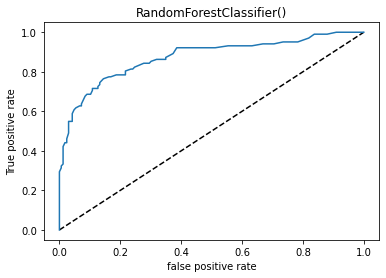

auc_score: 0.799492085991023




In [60]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
#100 --> default
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))
y_pred_prob=rf.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=rf)
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.title(rf)
plt.show()
auc_score=roc_auc_score(y_test,rf.predict(x_test))
print("auc_score:" ,auc_score)
print("\n")

0.8432835820895522
[[148  18]
 [ 24  78]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       166
           1       0.81      0.76      0.79       102

    accuracy                           0.84       268
   macro avg       0.84      0.83      0.83       268
weighted avg       0.84      0.84      0.84       268



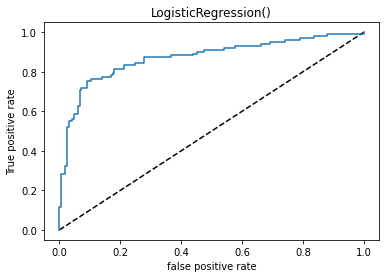

auc_score: 0.828136073706591




In [61]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
print(accuracy_score(y_test,predlg))
print(confusion_matrix(y_test,predlg))
print(classification_report(y_test,predlg))
y_pred_prob=lg.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=lg)
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.title(lg)
plt.show()
auc_score=roc_auc_score(y_test,lg.predict(x_test))
print("auc_score:" ,auc_score)
print("\n")

### Performimg cross validation

In [63]:
from sklearn.model_selection import cross_val_score
dtscores=cross_val_score(dtc,x,y,cv=5)
print(dtscores)
print(dtscores.mean(),dtscores.std())

[0.57541899 0.80898876 0.8258427  0.78089888 0.84269663]
0.7667691921411086 0.09782810744611367


In [64]:
rfscores=cross_val_score(rf,x,y,cv=5)
print(rfscores)
print(rfscores.mean(),rfscores.std())

[0.70949721 0.80337079 0.84831461 0.80898876 0.82022472]
0.7980792166216809 0.046920803741139466


In [79]:
lgscores=cross_val_score(lg,x,y,cv=5)
print(lgscores)
print(lgscores.mean(),lgscores.std())

[0.76536313 0.80898876 0.7752809  0.76966292 0.80898876]
0.7856568953612454 0.01930832812071065


### Hyper-Parameter Tuning

In [110]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [68]:
grid_param={
    'criterion':['gini','entropy'],
    'max_depth': [4,5,6,7,8],
    'n_estimators': [100,500],
    'max_features':['auto','sqrt','log2']
    
}

In [69]:
grid_search=RandomizedSearchCV(estimator=rf,param_distributions=grid_param,cv=5)

In [70]:
grid_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [4, 5, 6, 7, 8],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [100, 500]})

In [71]:
best_parameters=grid_search.best_params_
print(best_parameters)

{'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': 7, 'criterion': 'entropy'}


0.835820895522388
[[149  17]
 [ 27  75]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       166
           1       0.82      0.74      0.77       102

    accuracy                           0.84       268
   macro avg       0.83      0.82      0.82       268
weighted avg       0.83      0.84      0.83       268



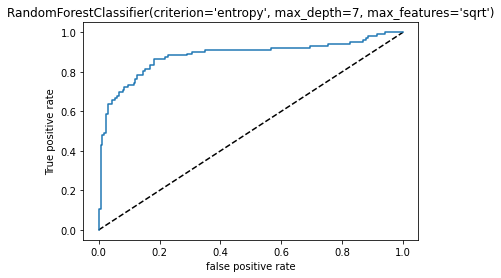

auc_score: 0.816442239546421




In [74]:
rfc=RandomForestClassifier(criterion='entropy',max_depth=7,max_features='sqrt',n_estimators=100)
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)
predrfc=rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))
y_pred_prob=rfc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=rfc)
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.title(rfc)
plt.show()
auc_score=roc_auc_score(y_test,rfc.predict(x_test))
print("auc_score:" ,auc_score)
print("\n")

In [75]:
rfcscores=cross_val_score(rfc,x,y,cv=5)
print(rfcscores)
print(rfcscores.mean(),rfcscores.std())

[0.69832402 0.8258427  0.84269663 0.79775281 0.84269663]
0.8014625572782625 0.054122468886329635


In [122]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [125]:
logistic=LogisticRegression()
grid_search=RandomizedSearchCV(logistic,param_grid,cv=5)

In [126]:
grid_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                         'max_iter': [100, 1000, 2500, 5000],
                                         'penalty': ['l1', 'l2', 'elasticnet',
                                                     'none'],
                                         'solver': ['lbfgs', 'newton-cg',
                                                    'liblinear', 'sag',
                                                    'saga']}])

In [127]:
best_parameters=grid_search.best_params_
print(best_parameters)

{'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 1000, 'C': 10000.0}


0.7804878048780488
[[125  21]
 [ 33  67]]
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       146
           1       0.76      0.67      0.71       100

    accuracy                           0.78       246
   macro avg       0.78      0.76      0.77       246
weighted avg       0.78      0.78      0.78       246



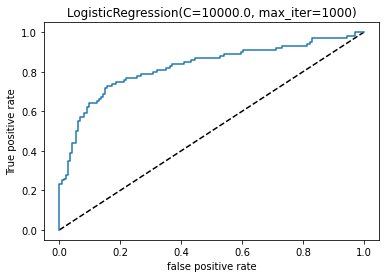

auc_score: 0.7630821917808219
[0.78658537 0.7804878  0.76829268 0.79268293 0.79268293]
0.7841463414634147 0.009125993626277914




In [128]:
lr=LogisticRegression(C=10000.0,penalty='l2',solver='lbfgs',max_iter=1000)
lr.fit(x_train,y_train)
predlg=lr.predict(x_test)
print(accuracy_score(y_test,predlg))
print(confusion_matrix(y_test,predlg))
print(classification_report(y_test,predlg))
y_pred_prob=lr.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=lr)
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.title(lr)
plt.show()
auc_score=roc_auc_score(y_test,lr.predict(x_test))
print("auc_score:" ,auc_score)
lrscores=cross_val_score(lr,x,y,cv=5)
print(lrscores)
print(lrscores.mean(),lrscores.std())
print("\n")

### Saving the model

As we have min difference betwwen accuracy score and cross val score in Random Forest Classifier. Also, auc score is higher in random forest, So we select Random Forest as our best model

In [129]:
import joblib
joblib.dump('rfc','titanic.obj')

['titanic.obj']